## *01. Selección de características*

* La selección de características, también conocida como selección de variables, es un proceso de selección de un subconjunto relevante de características en un conjunto de datos más grande para construir un modelo de aprendizaje automático. El objetivo de la selección de características es reducir la complejidad del modelo, mejorar la precisión y la interpretación de los resultados y reducir el tiempo y los recursos necesarios para entrenar el modelo.

* La selección de características es importante porque los modelos de aprendizaje automático pueden tener dificultades para aprender patrones precisos y significativos si se les alimenta con demasiadas características irrelevantes o redundantes. Además, la selección de características puede mejorar la generalización del modelo, lo que significa que el modelo es más capaz de hacer predicciones precisas en nuevos datos que no se han visto antes.

* Existen varios métodos para realizar la selección de características, que incluyen:

    * Filtros: utilizan una métrica estadística para evaluar la relevancia de cada característica y seleccionan las características con la puntuación más alta.

    * Wrapper: utilizan un modelo de aprendizaje automático para evaluar la relevancia de cada característica y seleccionar las características que dan como resultado un mejor rendimiento del modelo.

    * Embebidos: integran la selección de características en el proceso de entrenamiento del modelo, lo que permite que el modelo aprenda qué características son las más importantes para el problema.

* La selección de características puede ser especialmente útil en problemas de alta dimensionalidad, donde hay muchas características disponibles pero solo algunas son relevantes para el problema en cuestión. Al seleccionar cuidadosamente las características, es posible crear modelos más precisos, interpretables y eficientes.

In [1]:
# Core
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import empiricaldist
import warnings
from scipy import stats

# Display
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format
sns.set_theme(context='notebook', style=plt.style.use('dark_background'))
warnings.simplefilter('ignore')

In [2]:
# Lectura de los datos
data = pd.read_parquet('../datasets/train_preprocesado.parquet')
data.head()

,id,fraude,valor,hora_aux,dist_max_nal,canal1,fecha,cod_pais,canal,diasem,diames,fecha_vin,oficina_vin,sexo,segmento,edad,ingresos,egresos,nropaises,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
0,9000000001,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
1,9000000002,1,0.00,17,594.77,atm_int,1970-01-01,us,atm_int,5,15,1970-01-01,716.00,m,personal plus,29.00,"5,643,700.00","500,000.00",1,5,289.99,"4,552.41","2,029.90"
2,9000000003,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
3,9000000004,1,0.00,13,659.13,atm_int,1970-01-01,us,atm_int,5,1,1970-01-01,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
4,9000000005,1,0.00,0,1.00,atm_int,1970-01-01,cr,atm_int,0,10,1970-01-01,788.00,m,personal,25.00,0.00,0.00,1,1,NaN,"1,482.35",1.00


In [3]:
# Transponemos los índices
data.index = data['id']

# Nos deshacemos de las variables que no aportan
data.drop(['id', 'fecha', 'fecha_vin'], inplace=True, axis=1)
data.head()

,fraude,valor,hora_aux,dist_max_nal,canal1,cod_pais,canal,diasem,diames,oficina_vin,sexo,segmento,edad,ingresos,egresos,nropaises,nrociudades,dist_mean_nal,dist_hoy,dist_sum_nal
id,,,,,,,,,,,,,,,,,,,,
9000000001,1,0.00,13,659.13,atm_int,us,atm_int,5,1,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
9000000002,1,0.00,17,594.77,atm_int,us,atm_int,5,15,716.00,m,personal plus,29.00,"5,643,700.00","500,000.00",1,5,289.99,"4,552.41","2,029.90"
9000000003,1,0.00,13,659.13,atm_int,us,atm_int,5,1,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
9000000004,1,0.00,13,659.13,atm_int,us,atm_int,5,1,392.00,m,personal plus,29.00,"1,200,000.00","1,200,000.00",1,6,474.94,"4,552.41","5,224.36"
9000000005,1,0.00,0,1.00,atm_int,cr,atm_int,0,10,788.00,m,personal,25.00,0.00,0.00,1,1,NaN,"1,482.35",1.00


### *Separar*

In [4]:
from sklearn.model_selection import train_test_split

# Separamos los features y el target
X = data.loc[:, data.columns != 'fraude']
y = data.loc[:, data.columns == 'fraude'].squeeze()

# Splitting
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=25)
print(f'80% Train set: {X_train.shape, y_train.shape}')
print(f'20% Validation set: {X_val.shape, y_val.shape}')

80% Train set: ((2368, 19), (2368,))
20% Validation set: ((592, 19), (592,))


### *Capturar*

In [5]:
# Función para capturar los tipos de variables
def capture_variables(data:pd.DataFrame) -> tuple:
    
    """
    Function to capture the types of Dataframe variables

    Args:
        dataframe: DataFrame
    
    Return:
        variables: tuple
    
    The order to unpack variables:
    1. continuous
    2. categoricals
    3. discretes
    4. temporaries
    """

    numericals = list(data.select_dtypes(include = [np.int64, np.int32, np.float64, np.float32]).columns)
    categoricals = list(data.select_dtypes(include = ['category', 'object', 'bool']).columns)
    temporaries = list(data.select_dtypes(include = ['datetime', 'timedelta']).columns)
    discretes = [col for col in data[numericals] if len(data[numericals][col].unique()) <= 10]
    continuous = [col for col in data[numericals] if col not in discretes]

    # Variables
    print('\t\tTipos de variables')
    print(f'Hay {len(continuous)} variables continuas')
    print(f'Hay {len(discretes)} variables discretas')
    print(f'Hay {len(temporaries)} variables temporales')
    print(f'Hay {len(categoricals)} variables categóricas')

    variables = tuple((continuous, categoricals, discretes, temporaries))
    
    # Retornamos una tupla de listas
    return variables


# Captura de variables
continuous, categoricals, discretes, temporaries = capture_variables(data=X)

		Tipos de variables
Hay 12 variables continuas
Hay 2 variables discretas
Hay 0 variables temporales
Hay 5 variables categóricas


### *Constantes*
Las características constantes son aquellas que muestran el mismo valor, un único valor, para todas las observaciones del conjunto de datos. 

En otras palabras, el mismo valor para todas las filas del conjunto de datos. Estas características no proporcionan ninguna información que permita a un modelo de aprendizaje automático discriminar o predecir un objetivo.

In [6]:
# Podemos encontrar las variables/características constantes con una comprensión de lista
constant_features_continuous = [feat for feat in X_train[continuous].columns if X_train[continuous][feat].std() == 0]
len(constant_features_continuous)

0

In [7]:
# Podemos hallar las variables/características que solo tienen una etiqueta con la siguiente comprensión de lista
constant_features_categoricals = [feat for feat in X_train[categoricals].columns if X_train[categoricals][feat].nunique(dropna=False) == 1]
len(constant_features_categoricals)

0

In [8]:
# Podemos hallar las variables/características que solo tienen una etiqueta con la siguiente comprensión de lista
X_train[discretes] = X_train[discretes].astype('category')
X_val[discretes] = X_val[discretes].astype('category')

constant_features_discretes = [feat for feat in X_train[discretes].columns if X_train[discretes][feat].nunique(dropna=False) == 1]
len(constant_features_discretes)

0

### *Cuasi-constantes*
Las características cuasi constantes son aquellas que muestran el mismo valor para la gran mayoría de las observaciones del conjunto de datos.

En general, estas características aportan poca o nula información que permita a un modelo de aprendizaje automático discriminar o predecir un objetivo, aunque puede haber excepciones. Por lo tanto, hay que tener cuidado al eliminar este tipo de características.

In [9]:
# Crear una lista vacía
quasi_constant_feat = list()

# Iterar sobre cada característica
for feature in X_train[continuous].columns:
    # Encontrar el valor predominante, es decir, el valor compartido por la mayoría de las observaciones
    predominant = (X_train[continuous][feature].value_counts() / float(len(X_train[continuous]))).sort_values(ascending=False).values[0]
    # Evaluar la característica predominante: ¿Más del 99% de las observaciones muestran 1 valor?
    if predominant > 0.998:
        # En caso afirmativo, añada la característica a la lista
        quasi_constant_feat.append(feature)

# Resultado
print(f'Features cuasi-constantes: {len(quasi_constant_feat)}')

Features cuasi-constantes: 0


### *Duplicadas*
A menudo, los conjuntos de datos contienen características duplicadas, es decir, características que, a pesar de tener nombres diferentes, son idénticas.

Identificar y eliminar características duplicadas, por tanto, redundantes, es un primer paso sencillo hacia la selección de características y modelos de aprendizaje automático más interpretables.

In [10]:
# Comprobar si hay características duplicadas en el conjunto de entrenamiento:

# Crear una lista vacía para recoger las características que se han encontrado duplicadas
duplicated_features = list()

# Crear un diccionario vacío, donde almacenaremos los grupos de duplicados
duplicated_feat_pairs = dict()

# Iterar sobre cada característica de nuestro conjunto de datos:
for i in range(len(X_train.columns)):
    
    # Elige 1 característica:
    feat_1 = X_train.columns[i]
    
    # Si esta característica ya fue identificada como duplicada, la omitimos, si aún 
    # no ha sido identificada como duplicada, entonces procedemos:
    if feat_1 not in duplicated_features:
    
        # Creamos una lista vacía como entrada para esta función en el diccionario:
        duplicated_feat_pairs[feat_1] = list()

        # Ahora, iteramos sobre las características restantes del conjunto de datos
        for feat_2 in X_train.columns[i + 1:]:

            # Comprobamos si esta segunda característica es idéntica a la primera
            if X_train[feat_1].equals(X_train[feat_2]):

                # Si es idéntica, añádela a la lista del diccionario
                duplicated_feat_pairs[feat_1].append(feat_2)
                
                # Y añadela a nuestra lista de control de variables duplicadas
                duplicated_features.append(feat_2)
                
# Resultado
print(f'Features duplicados: {len(duplicated_features)}')

Features duplicados: 0


### *Correlacionadas*
La selección de características correlacionadas evalúa subconjuntos de características basándose en la siguiente hipótesis:

> "Los buenos subconjuntos de características contienen características altamente correlacionadas con el objetivo, pero no correlacionadas entre sí".

La **correlación** puede generar problemas en el modelo y hacer que las predicciones sean menos precisas o incluso erróneas. Por lo tanto, es importante evitar la **correlación** en el aprendizaje automático para mejorar la precisión y estabilidad del modelo, facilitar la interpretación de los resultados y mejorar la capacidad de generalización del modelo.

In [11]:
# Con la siguiente función podemos seleccionar características altamente correlacionadas se eliminará la primera característica 
# que se correlaciona con cualquier otra cosa sin ninguna otra percepción.
def correlation(dataset, threshold):
    
    # Crear un conjunto "set" donde se almacenarán los nombres de las columnas correlacionadas
    col_corr = set()
    
    # Crear la matrix de correlación
    corr_matrix = dataset.corr()
    
    # Para cada característica del conjunto de datos (columnas de la matriz de correlaciones)
    for i in range(len(corr_matrix.columns)):  
        # Comprobar con otras características
        for j in range(i): 
            # Si la correlación es superior a un determinado umbral
            if abs(corr_matrix.iloc[i, j]) > threshold: # Nos interesa el valor absoluto
                abs(corr_matrix.iloc[i, j]), corr_matrix.columns[i], corr_matrix.columns[j]
                # Obtenemos el nombre de la característica correlacionada
                colname = corr_matrix.columns[j]
                # Finalmente agregamos la característica al conjunto
                col_corr.add(colname)
                
    return col_corr


# Llamamos a la función
corr_features = correlation(dataset=X_train, threshold=0.75)
print(f'Features correlacionados: {corr_features}')

Features correlacionados: set()


### *Test-Chi²*
* El test de Chi² se utiliza para probar una hipótesis como "La variable A está relacionada con la variable B" ó "No hay relación entre la variable A y la variable B".

* La significancia del test se mide por el nivel de confianza o el valor *p*, que indica la probabilidad de obtener el resultado observado por azar si no hay relación entre las variables.

In [12]:
from sklearn.pipeline import Pipeline
from feature_engine.selection import DropConstantFeatures
from feature_engine.selection import DropDuplicateFeatures
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

# Hacemos lectura de los subsets
X_train = pd.read_parquet('../datasets/subsets/X_train.parquet')
X_val = pd.read_parquet('../datasets/subsets/X_val.parquet')

# Creamos unas copias para hacer pruebas más adelante
X_train_original = X_train.copy()
X_val_original = X_val.copy()

### *Pipeline*
* En el aprendizaje automático (Machine Learning), una pipeline se refiere a una secuencia de pasos que se utilizan para procesar, transformar los datos y construir un modelo predictivo.

* La utilización de pipelines en el aprendizaje automático ayuda a automatizar y simplificar el proceso de construcción de modelos, lo que a su vez puede reducir los errores y el tiempo necesario para implementar un modelo. Además, también facilita la reproducción de los resultados y la comparación de diferentes modelos y técnicas de preprocesamiento de datos.

In [13]:
# Apilamos todos los métodos de selección dentro de una Pipeline
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(method='pearson', cv=5)),
])
pipe.fit(X_train)

# Removemos los features
X_train = pipe.transform(X_train)
X_val = pipe.transform(X_val)

X_train.shape, X_val.shape

((2368, 19), (592, 19))

In [14]:
# Resultados de las transformaciones en la Pipeline
print(f"""\tResultados de las trasnformaciones
• Features constantes y cuasi-constantes: {pipe.named_steps['constant'].features_to_drop_}
• Features duplicados: {pipe.named_steps['duplicated'].features_to_drop_}
• Features correlacionados: {pipe.named_steps['correlation'].features_to_drop_}""")

	Resultados de las trasnformaciones
• Features constantes y cuasi-constantes: []
• Features duplicados: set()
• Features correlacionados: ['canal']


### *p-value*

* El *p-value* (valor p) es una medida estadística que se utiliza para evaluar el nivel de significancia de un resultado en un test de hipótesis. En general, se usa para determinar si la evidencia observada en los datos proporciona una base suficiente para rechazar o no la hipótesis nula.

* En un test de hipótesis, la hipótesis nula es la afirmación que se está tratando de refutar y la hipótesis alternativa es la afirmación que se está tratando de probar. El *p-value* representa la probabilidad de obtener un resultado igual o más extremo que el observado, asumiendo que la hipótesis nula es verdadera. En otras palabras, es la probabilidad de que el resultado sea un efecto aleatorio o casualidad.

* El *p-value* se expresa como un número entre 0 y 1, y se interpreta como la probabilidad de obtener el resultado observado si la hipótesis nula es verdadera. Si el *p-value* es menor que el nivel de significancia predefinido (generalmente 0.05), se rechaza la hipótesis nula y se acepta la hipótesis alternativa. Si el *p-value* es mayor que el nivel de significancia, no se rechaza la hipótesis nula y se concluye que no hay evidencia suficiente para afirmar que la hipótesis alternativa es verdadera.

En resumen, el *p-value* es una medida estadística importante que se utiliza para evaluar la significación de un resultado en un test de hipótesis y determinar si la hipótesis nula debe ser rechazada o no.

In [15]:
# Obtenemos los p-values
pvalues = pd.DataFrame(chi2(X_train, y_train)[1], columns=['p-value'])
pvalues.index = X_train.columns
pvalues.sort_values(ascending=True, by='p-value', inplace=True)
pvalues

,p-value
canal1,0.00
valor,0.00
ingresos,0.00
diames,0.00
edad,0.00
dist_mean_nal,0.00
cod_pais,0.00
egresos,0.00
dist_hoy,0.00
hora_aux,0.00


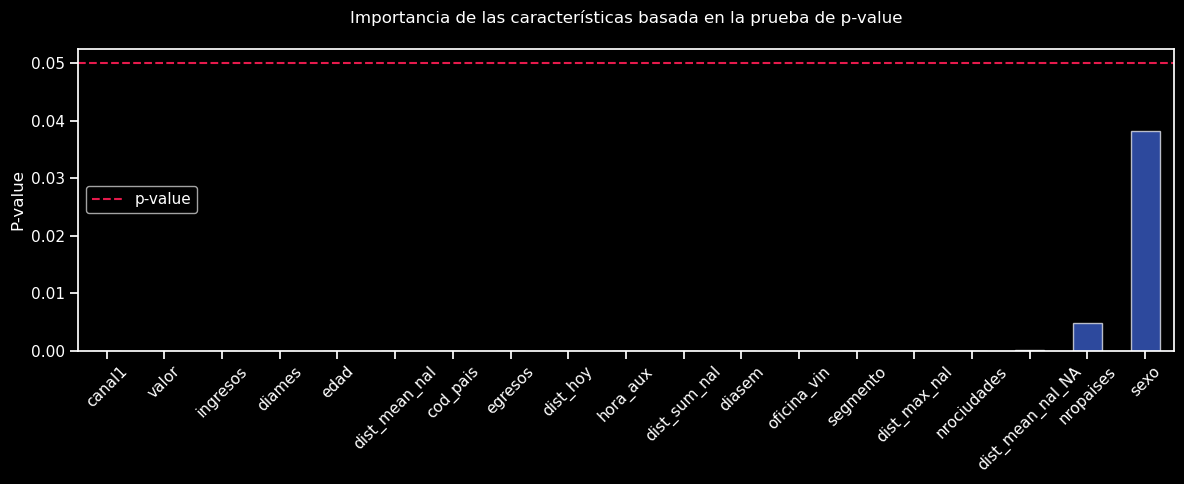

In [16]:
# Gráficamente
pvalues.columns = ['']
fig, ax = plt.subplots(figsize=(12, 5))
pvalues.plot.bar(rot=45, color='royalblue', alpha=0.7, lw=1, edgecolor='white', ax=ax)
plt.title('Importancia de las características basada en la prueba de p-value\n')
plt.axhline(y=0.05, color='#E51A4C', linestyle='dashed', linewidth=1.5, label='p-value')
plt.ylabel('P-value')
plt.legend(loc='center left')
plt.tight_layout()

In [17]:
# Seleccionar un "k" número de variables de manera arbitraria
sel_ = SelectKBest(chi2, k=6)
sel_.fit(X_train, y_train)

# Variables que conservamos
headers = list(X_train.columns[sel_.get_support()])
headers

['valor', 'canal1', 'diames', 'edad', 'ingresos', 'dist_mean_nal']

In [18]:
# Removemos el restante de features
X_train_chi2 = pd.DataFrame(sel_.transform(X_train), columns=headers, index=X_train.index)
X_val_chi2 = pd.DataFrame(sel_.transform(X_val), columns=headers, index=X_val.index)

### *Métrica univariada*
Esta técnica funciona de la siguiente manera:

* Primero, se construye un árbol de decisión por característica, para predecir el objetivo (target).
* En segundo lugar, se realiza predicciones utilizando el árbol de decisión y la característica seleccionada.
* En tercer lugar, mide el rendimiento de la predicción, basado en una métrica, ya sea el roc-auc, el mse o cualquier otra métrica.
* En cuarto lugar, se clasifica las características según la métrica de aprendizaje automático.
* Finalente seleccionar las características con mejor rendimiento.

In [19]:
# Traemos de regreso nuestros datasets originales
X_train = X_train_original.copy()
X_val = X_val_original.copy()

# Apilamos todos los métodos de selección dentro de una Pipeline
pipe = Pipeline([
    ('constant', DropConstantFeatures(tol=0.998)),
    ('duplicated', DropDuplicateFeatures()),
    ('correlation', SmartCorrelatedSelection(method='pearson', cv=5)),
])
pipe.fit(X_train)

# Removemos los features
X_train = pipe.transform(X_train)
X_val = pipe.transform(X_val)

X_train.shape, X_val.shape

((2368, 19), (592, 19))

### *ROC-AUC*
* La métrica ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) se utiliza comúnmente en el aprendizaje automático para evaluar la calidad de los modelos de clasificación binaria.

* La curva ROC es una representación gráfica del rendimiento de un modelo de clasificación binaria que muestra la tasa de verdaderos positivos (sensibilidad) frente a la tasa de falsos positivos (1 - especificidad) para diferentes umbrales de decisión. El área bajo la curva ROC (AUC) se utiliza como medida de la capacidad de discriminación del modelo, es decir, la capacidad del modelo para distinguir entre las clases positiva y negativa.

* La métrica ROC-AUC es útil porque no se ve afectada por el desequilibrio de clases en los datos, lo que significa que se puede utilizar en conjuntos de datos donde una clase es mucho más común que la otra. Además, la curva ROC y el valor de AUC son útiles para comparar diferentes modelos y ajustar los umbrales de decisión para encontrar un equilibrio entre la tasa de verdaderos positivos y la tasa de falsos positivos que sea adecuado para el problema en cuestión.

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

# Determinar el roc-auc para cada característica
# Aquí almacenamos los resultados de la métrica
roc_values = list()

# Iteramos sobre cada característica del conjunto de datos
for feature in X_train.columns:
    # Entrenar un clasificador de árbol de decisión
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train[feature].to_frame(), y_train)
    # Obtener las predicciones
    y_pred = clf.predict_proba(X_val[feature].to_frame())
    # Calcular y almacenar el roc-auc
    roc_values.append(roc_auc_score(y_val, y_pred[:, 1]))
    
print(f'Número de roc-auc: {len(roc_values)}')
print(roc_values)

Número de roc-auc: 19
[0.6731309808612439, 0.5392494019138756, 0.539361543062201, 0.7438995215311004, 0.5829545454545454, 0.5538726076555024, 0.6448041267942584, 0.5987141148325359, 0.5519437799043062, 0.5485122607655503, 0.5737888755980861, 0.6400493421052632, 0.5548818779904306, 0.6286558014354067, 0.6192808014354068, 0.5258373205741627, 0.6413651315789474, 0.5352870813397128, 0.5904680023923445]


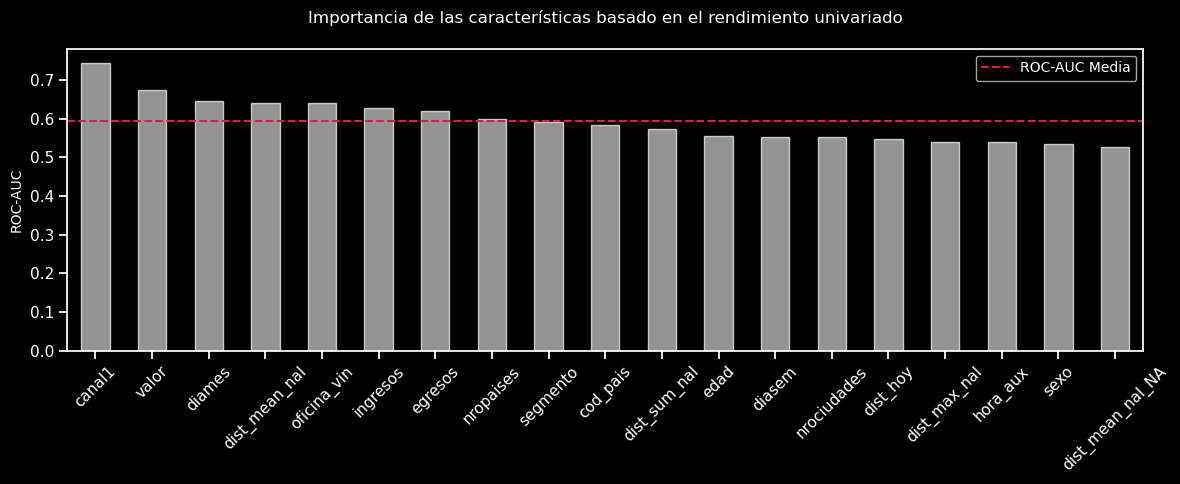

In [21]:
# 1) Capturamos los valores roc-auc en una serie de pandas
# 2) Agregamos los nombres de las variables en el índice
# 3) Ordenamos las características en función de la roc-auc
# 4) Finalmente graficamos

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False).plot.bar(figsize=(12, 5), rot=45, color='lightgray', alpha=0.7, lw=1, edgecolor='white')
plt.title('Importancia de las características basado en el rendimiento univariado\n')
plt.ylabel('ROC-AUC', fontsize=10)
plt.axhline(y=np.mean(roc_values), color='#E51A4C', linestyle='dashed', linewidth=1.5, label='ROC-AUC Media')
plt.legend(fontsize=10)
plt.tight_layout()

In [22]:
# Resultados
print(f'Número de características seleccionadas: {len(roc_values[roc_values > np.mean(roc_values)])}')
selected_features = roc_values[roc_values > np.mean(roc_values)].index
print(f'Características seleccionadas: {selected_features.to_list()}')

Número de características seleccionadas: 8
Características seleccionadas: ['valor', 'canal1', 'diames', 'nropaises', 'oficina_vin', 'ingresos', 'egresos', 'dist_mean_nal']


In [23]:
# Features seleccionados de forma univariada
X_train_univariado = X_train[selected_features]
X_val_univariado = X_val[selected_features]

X_train_univariado.shape, X_val_univariado.shape

((2368, 8), (592, 8))

### *Función de coste/pérdida*
* En el aprendizaje automático (Machine Learning), una **función de coste** (en inglés "cost function" o "loss function") es una medida que se utiliza para evaluar la calidad de un modelo de aprendizaje supervisado.

* La función de coste se utiliza para medir la discrepancia entre los valores predichos por el modelo y los valores reales del conjunto de datos de entrenamiento. El objetivo es minimizar esta discrepancia, es decir, minimizar la función de coste, para que el modelo se ajuste mejor a los datos y pueda generalizar correctamente a datos nuevos y no vistos previamente.

* La elección de una función de coste adecuada es fundamental en el proceso de entrenamiento de un modelo de aprendizaje automático, ya que afecta directamente a la calidad y precisión del modelo. Además, también puede influir en el tiempo y recursos necesarios para entrenar el modelo.

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import roc_auc_score


# Función de coste para evaluar el rendimiento del clasificador
def cost_function(X_train, y_train, X_val, y_val):
    
    # Instanciamos nuestro clasificador
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4, class_weight='balanced')
    rf.fit(X_train, y_train)
    
    # K-Fold estratificado
    skfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=25)

    # Resultados de la validación cruzada
    scores = cross_validate(rf,
                            X_train,
                            y_train,
                            scoring='roc_auc',
                            cv=skfold,
                            return_estimator=True,
                            return_train_score=True,
                            n_jobs=-1)
    
    # Rendimiento con el conjunto de train
    train_means = np.mean(scores['train_score'])
    train_std = np.std(scores['train_score'])

    # Rendimiento con el conjunto de validation
    val_means = np.mean(scores['test_score'])
    val_std = np.std(scores['test_score'])

    # Obtenemos el mejor estimador entrenado
    best_model = [estimator for idx, estimator in enumerate(scores['estimator']) if idx == np.argmax(scores['test_score'])][0]
    
    print('=== Train set ===')
    print(f'Mejor modelo de {type(best_model).__name__} con el conjunto de entrenamiento: {100*train_means:0.2f}% de media +/- {100*train_std:0.2f}% de desviación estándar\n')

    print('=== Validation set ===')
    print(f'Mejor modelo de {type(best_model).__name__} con el conjunto de validación: {100*val_means:0.2f}% de media +/- {100*val_std:0.2f}% de desviación estándar')


### *Evaluar*

### *Validación cruzada*
* Es una técnica utilizada en el aprendizaje automático (Machine Learning) y la estadística para evaluar el rendimiento de un modelo predictivo.

* La validación cruzada se utiliza para evitar problemas de sobreajuste (overfitting) en los modelos predictivos, que ocurren cuando el modelo se ajusta demasiado bien a los datos de entrenamiento y no generaliza bien a datos nuevos. Al dividir los datos en subconjuntos de entrenamiento y prueba y repetir el proceso varias veces, se obtiene una estimación más precisa del rendimiento del modelo y se reduce el riesgo de sobreajuste.

In [25]:
# Con todos los features
cost_function(X_train_original, y_train, X_val_original, y_val)

=== Train set ===
Mejor modelo de RandomForestClassifier con el conjunto de entrenamiento: 92.56% de media +/- 0.16% de desviación estándar

=== Validation set ===
Mejor modelo de RandomForestClassifier con el conjunto de validación: 90.78% de media +/- 1.61% de desviación estándar


In [26]:
# Con los features seleccionados por el test de Chi²
cost_function(X_train_chi2, y_train, X_val_chi2, y_val)

=== Train set ===
Mejor modelo de RandomForestClassifier con el conjunto de entrenamiento: 90.19% de media +/- 0.16% de desviación estándar

=== Validation set ===
Mejor modelo de RandomForestClassifier con el conjunto de validación: 88.62% de media +/- 1.70% de desviación estándar


In [27]:
# Con los features seleccionados de forma univariada
cost_function(X_train_univariado, y_train, X_val_univariado, y_val)

=== Train set ===
Mejor modelo de RandomForestClassifier con el conjunto de entrenamiento: 89.90% de media +/- 0.23% de desviación estándar

=== Validation set ===
Mejor modelo de RandomForestClassifier con el conjunto de validación: 88.09% de media +/- 1.45% de desviación estándar


---
---